# Goodreads books recommender system

## Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval

### Books

#### Cleaning

In [2]:
books_df = pd.read_csv('https://raw.githubusercontent.com/malcolmosh/goodbooks-10k/master/books_enriched.csv', index_col=[0], converters={"genres": literal_eval})

In [3]:
# Dropping unneeded columns
books_df = books_df.drop(columns=["description", "image_url", "small_image_url", "index", "authors_2"])

In [4]:
set(books_df["genres"].explode())

{'art',
 'biography',
 'books',
 'business',
 'chick-lit',
 'christian',
 'classics',
 'comics',
 'contemporary',
 'cookbooks',
 'crime',
 'fantasy',
 'fiction',
 'gay-and-lesbian',
 'graphic-novels',
 'historical-fiction',
 'history',
 'horror',
 'humor-and-comedy',
 'manga',
 'memoir',
 'music',
 'mystery',
 'nonfiction',
 'paranormal',
 'philosophy',
 'poetry',
 'psychology',
 'religion',
 'romance',
 'science',
 'science-fiction',
 'self-help',
 'spirituality',
 'sports',
 'suspense',
 'thriller',
 'travel',
 'young-adult'}

In [5]:
# Keep only english books.
books_df = books_df[books_df.language_code == 'eng']

In [6]:
# drop books with duplicated title
books_df = books_df.drop_duplicates(subset = ['title'])

In [7]:
#transform list columns to list
books_df['authors'] = books_df['authors'].apply(lambda x: x.strip('[]').replace("'","").split(", "))

#### EDA

In [8]:
books_df.head()

,authors,average_rating,best_book_id,book_id,books_count,genres,goodreads_book_id,isbn,isbn13,language_code,...,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,ratings_count,title,work_id,work_ratings_count,work_text_reviews_count
0,[Suzanne Collins],4.34,2767052,1,272,"[young-adult, fiction, fantasy, science-fictio...",2767052,439023483,9.780439e+12,eng,...,66715,127936,560092,1481305,2706317,4780653,"The Hunger Games (The Hunger Games, #1)",2792775,4942365,155254
1,"[J.K. Rowling, Mary GrandPré]",4.44,3,2,491,"[fantasy, fiction, young-adult, classics]",3,439554934,9.780440e+12,eng,...,75504,101676,455024,1156318,3011543,4602479,Harry Potter and the Sorcerer's Stone (Harry P...,4640799,4800065,75867
2,[Stephenie Meyer],3.57,41865,3,226,"[young-adult, fantasy, romance, fiction, paran...",41865,316015849,9.780316e+12,eng,...,456191,436802,793319,875073,1355439,3866839,"Twilight (Twilight, #1)",3212258,3916824,95009
3,[Harper Lee],4.25,2657,4,487,"[classics, fiction, historical-fiction, young-...",2657,61120081,9.780061e+12,eng,...,60427,117415,446835,1001952,1714267,3198671,To Kill a Mockingbird,3275794,3340896,72586
4,[F. Scott Fitzgerald],3.89,4671,5,1356,"[classics, fiction, historical-fiction, romance]",4671,743273567,9.780743e+12,eng,...,86236,197621,606158,936012,947718,2683664,The Great Gatsby,245494,2773745,51992


In [9]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9645 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   authors                    9645 non-null   object 
 1   average_rating             9645 non-null   float64
 2   best_book_id               9645 non-null   int64  
 3   book_id                    9645 non-null   int64  
 4   books_count                9645 non-null   int64  
 5   genres                     9645 non-null   object 
 6   goodreads_book_id          9645 non-null   int64  
 7   isbn                       9026 non-null   object 
 8   isbn13                     9110 non-null   float64
 9   language_code              9645 non-null   object 
 10  original_publication_year  9625 non-null   float64
 11  original_title             9085 non-null   object 
 12  pages                      9576 non-null   float64
 13  publishDate                9637 non-null   objec

In [10]:
# most rated books
books_df.sort_values('ratings_count', ascending = False)[["title","authors","average_rating", "ratings_count"]].iloc[0:20]

,title,authors,average_rating,ratings_count
0,"The Hunger Games (The Hunger Games, #1)",[Suzanne Collins],4.34,4780653
1,Harry Potter and the Sorcerer's Stone (Harry P...,"[J.K. Rowling, Mary GrandPré]",4.44,4602479
2,"Twilight (Twilight, #1)",[Stephenie Meyer],3.57,3866839
3,To Kill a Mockingbird,[Harper Lee],4.25,3198671
4,The Great Gatsby,[F. Scott Fitzgerald],3.89,2683664
5,The Fault in Our Stars,[John Green],4.26,2346404
6,The Hobbit,[J.R.R. Tolkien],4.25,2071616
7,The Catcher in the Rye,[J.D. Salinger],3.79,2044241
9,Pride and Prejudice,[Jane Austen],4.24,2035490
8,"Angels & Demons (Robert Langdon, #1)",[Dan Brown],3.85,2001311


In [11]:
# authors of top 100 rated books
top_100 = books_df.sort_values(['average_rating'], ascending = False).iloc[0:100,:]

# transform authors to list and get top 15 authors that appear in top 100 books
authors_top_100 = pd.Series([x for item in top_100['authors'] for x in item]).value_counts().to_frame('counts').reset_index()
authors_top_100 = authors_top_100.iloc[0:15,:]

In [12]:
sns.set()

<AxesSubplot:xlabel='average_rating', ylabel='Count'>

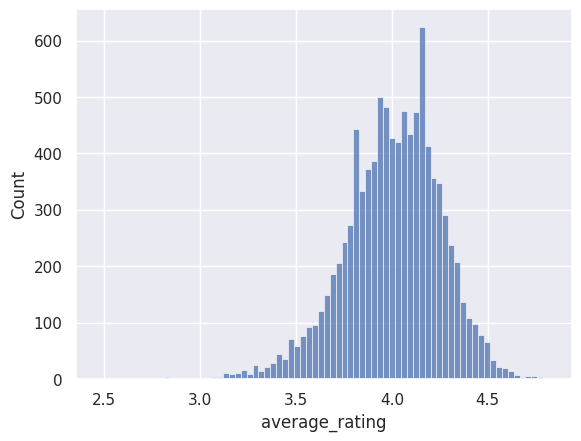

In [13]:
sns.histplot(data = books_df, x = "average_rating")

[(0.0, 300000.0)]

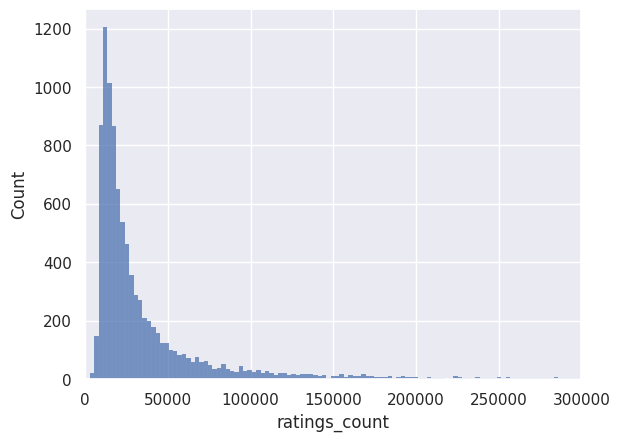

In [14]:
sns.histplot(data = books_df, x = "ratings_count").set(xlim=(0, 300000))

[(0.0, 1000000.0)]

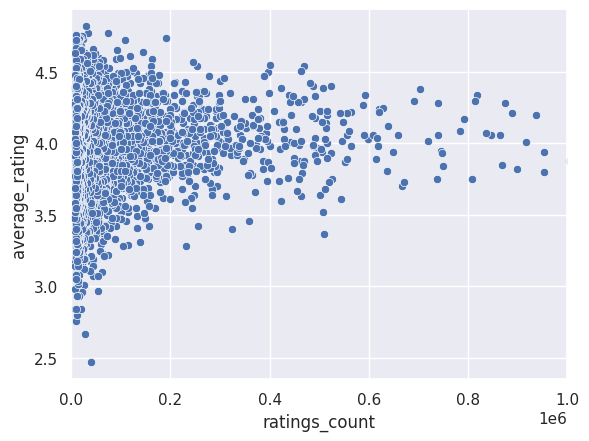

In [15]:
sns.scatterplot(data = books_df, x = "ratings_count", y = "average_rating").set(xlim=(0, 1000000))

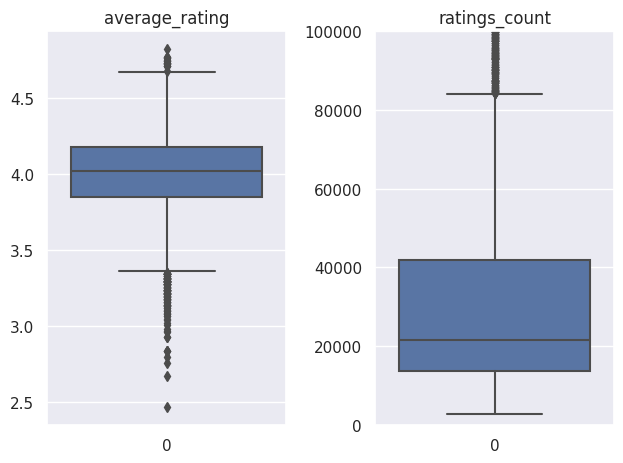

In [16]:
columns_to_plot = ['average_rating', 'ratings_count']
fig, axes = plt.subplots(ncols=len(columns_to_plot))
for column, axis in zip(columns_to_plot, axes):
    if column == 'ratings_count':
        sns.boxplot(data=books_df[column], ax=axis).set(ylim=(0, 100000))
    else:
        sns.boxplot(data=books_df[column], ax=axis)
    axis.set_title(column)
plt.tight_layout()
plt.show()

### Ratings

In [17]:
ratings_df = pd.read_csv('https://raw.githubusercontent.com/malcolmosh/goodbooks-10k/master/ratings.csv')

In [18]:
# remove the books not in our dataframe
ratings_df = ratings_df[ratings_df.book_id.isin(books_df.book_id)]

In [19]:
ratings_df.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [20]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872013 entries, 0 to 5976478
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   book_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 179.2 MB


In [21]:
len(ratings_df["user_id"].unique())

53424

~50k users

In [22]:
ratings_df.describe()

,user_id,book_id,rating
count,5.872013e+06,5.872013e+06,5.872013e+06
mean,2.620976e+04,1.978492e+03,3.921440e+00
std,1.541720e+04,2.449060e+03,9.907901e-01
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.279100e+04,1.970000e+02,3.000000e+00
50%,2.591000e+04,8.650000e+02,4.000000e+00
75%,3.950000e+04,2.908000e+03,5.000000e+00
max,5.342400e+04,1.000000e+04,5.000000e+00


[Text(0.5, 0, 'Number of ratings by users')]

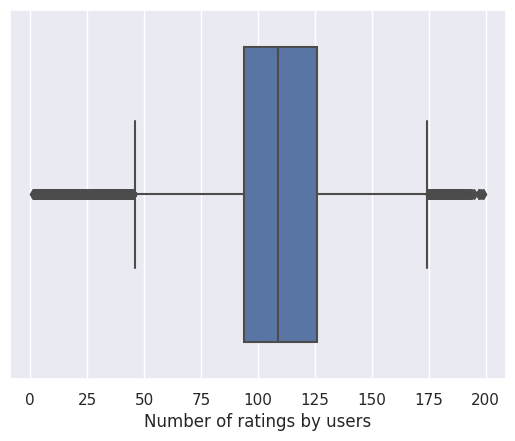

In [23]:
sns.boxplot(x=ratings_df.groupby('user_id')['book_id'].count()).set(xlabel = "Number of ratings by users")

In [24]:
# av_rating_user = ratings_df.groupby('user_id')['rating'].mean().reset_index()
# sns.histplot(data = rating_df, x = user_id)

### Other tables
Don't know if these will be needed for our purpose:
- **tags** - Shelf name (genre) and count of the books in that shelf
- **book_tags** - Shelves with the count for each book
- **to_read** - books to read for user

In [25]:
tags_df = pd.read_csv('https://raw.githubusercontent.com/malcolmosh/goodbooks-10k/master/tags.csv')

In [26]:
book_tags_df = pd.read_csv('https://raw.githubusercontent.com/malcolmosh/goodbooks-10k/master/book_tags.csv')

In [27]:
to_read_df = pd.read_csv('https://raw.githubusercontent.com/malcolmosh/goodbooks-10k/master/to_read.csv')

## Splits

there is no temporal data about the reviews, hence random is the best we can do... (I think)

In [28]:
from sklearn.model_selection import train_test_split
import numpy


In [29]:
train, test = train_test_split(ratings_df, test_size=0.2)
pivot_table = train.pivot_table(index='user_id', columns='book_id', values='rating')
matrix = pivot_table.to_numpy()

## Naive Baseline

fills the gaps with median

In [33]:
def naive(matrix):
    medians = []
    for i in range(matrix.shape[1]):
        medians.append(np.nanmedian(matrix[:,i]))
    
    # its faster that way
    medians = []
    for i in range(matrix.shape[1]):
        medians.append(np.nanmedian(matrix[:,i]))
    medians = np.array(medians)
    
    for i,row in enumerate(matrix):
        matrix[i][np.isnan(row)] = medians[np.isnan(row)]
    return matrix

## Testing

In [34]:
result1 = naive(matrix.copy())


In [35]:
result1

array([[4., 5., 3., ..., 4., 4., 4.],
       [4., 5., 3., ..., 4., 4., 4.],
       [4., 5., 3., ..., 4., 4., 4.],
       ...,
       [4., 5., 3., ..., 4., 4., 4.],
       [4., 5., 3., ..., 4., 4., 4.],
       [4., 5., 4., ..., 4., 4., 4.]])